In [1]:
#II. displacement plot

# 2. process displacement csv data of gaus& jacobi & newmark;combine three csv files and plot

## 2.1 combine two csv files(gaus& jacobi) first;

'''
This program reads two csv files and merges them based on a common key column.
'''
# import the pandas library
# you can install using the following command: pip install pandas

import pandas as pd

# Read the files into two dataframes.
df1 = pd.read_csv('2D_Gaus_WR_plot_res_52.csv')
df2 = pd.read_csv('2D_Jaco_WR_plot_res_52.csv')

# Merge the two dataframes, using dt column as key
df3 = pd.merge(df1, df2,on = 'dt')
df3.set_index('dt', inplace = True)

# Write it to a new CSV file
df3.to_csv('2D_combined_g_j_dispalcement.csv')

In [2]:
## 2.2 combine the above combines file1 and the newmark csv file
import pandas as pd

df0 = pd.read_csv('2D_combined_g_j_dispalcement.csv')
df = pd.read_csv('2D_Newmark_U_dN_plot_res_52.csv')

df_c = pd.merge(df0,df, on = 'dt')
df_c.set_index('dt', inplace = True)

df_c.to_csv('2D_combined_gjn_displacement.csv')

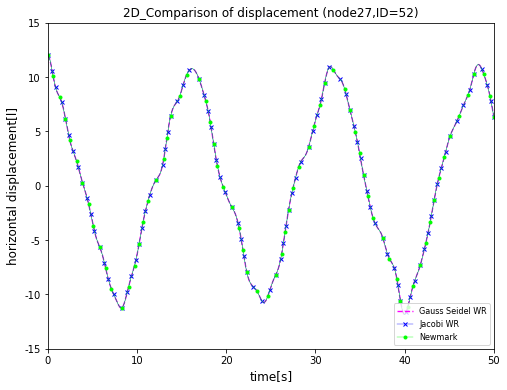

In [12]:
##2.3 plot with above final combined csv file :combined_gjn_displacement.csv
import csv
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 
 
data = pd.read_csv('2D_combined_gjn_displacement.csv')
 
xdata = []
y1data = []
y2data = []
y3data = []
xdata = data.loc[:, 'dt']
#xdata=0:0.3:80;
 
ydata = data.loc[:, 'WR_x']
y2data = data.loc[:, 'WR_y']
y3data = data.loc[:,'U_dN']

#print(xdata)
#print(ydata)

plt.plot(xdata, ydata, c='magenta',ls ='--', lw = 1.4, label=u'Gauss Seidel WR')
plt.plot(xdata, y2data, marker='x',markevery=0.03, markersize=3.5,c='blue',ls='-',lw=0.4,label="Jacobi WR")
plt.plot(xdata, y3data, marker='o',markevery=0.04,markersize=3.0,lw=0.4, c='lime',label="Newmark")
#plt.plot(x, d2t,ls ='-',color = 'red',lw = 0.8,label="Exact analytical solution for m2")

#plt.plot(x,y1,ls='--',lw=4,c='b',alpha=0.5,label='totm
plt.xlim(0,50)
plt.ylim(-15,15)

plt.title('2D_Comparison of displacement (node27,ID=52)', size=12)

plt.legend(loc=4, prop = {'size':8})
plt.xlabel(u'time[s]', size=12)
plt.ylabel(u'horizontal displacement[l]', size=12)
 
plt.show()